# Consignas laboratorio 1

1. Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de-suscriptores-de-telefonia-movil-miles-de-minutos/ 

2. Explorar los datos, visualizarlos

3. Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing)

4. Visualizar los resultados y evaluarlos, comparando ambas implementaciones


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red = '#D62728'
blue = '#1F77B4'
green = '#38a445'
%matplotlib inline

In [70]:
data = pd.read_csv('datasets/Telefonia_movil.csv', parse_dates=True)
data.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


### Pre trabajo con los datos

In [71]:
# Cambiar los nombres de columnas por nombres mas cortos.

data = data.rename(columns={'Año':'anio',
                            'Minutos pospago salientes (miles)':'postpay_out_mins', 
                            'Minutos prepago salientes (miles)':'prepay_out_mins', 
                            'Total de minutos salientes (miles)':'tot_out_mins'})

In [72]:
# Transformación de las columnas para definir PeriodIndex

data['date'] = data['anio'].astype(str) +'Q'+ data['Trimestre'].astype(str)

data.index = pd.PeriodIndex(data['date'], freq='Q')

## Visualización de los datos

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 22 entries, 2013Q1 to 2018Q2
Freq: Q-DEC
Data columns (total 7 columns):
anio                22 non-null int64
Trimestre           22 non-null int64
postpay_out_mins    22 non-null object
prepay_out_mins     22 non-null int64
tot_out_mins        22 non-null int64
Periodo             22 non-null object
date                22 non-null object
dtypes: int64(4), object(3)
memory usage: 1.4+ KB


In [74]:
# Convertir los datos de postpay_out_mins a int, ya que del tipo string
data['postpay_out_mins'] = data['postpay_out_mins'].str.replace('.','')
data['postpay_out_mins'] = data['postpay_out_mins'].astype(int)

In [75]:
data.describe()

,anio,Trimestre,postpay_out_mins,prepay_out_mins,tot_out_mins
count,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2015.272727,2.409091,1.209691e+07,6.604273e+06,1.870118e+07
std,1.638287,1.140555,2.077349e+06,5.251805e+05,1.990543e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.250000,1.044198e+07,6.291007e+06,1.735731e+07
50%,2015.000000,2.000000,1.164553e+07,6.580968e+06,1.883452e+07
75%,2016.750000,3.000000,1.408623e+07,7.100940e+06,1.974379e+07
max,2018.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


In [76]:
data.head()

,anio,Trimestre,postpay_out_mins,prepay_out_mins,tot_out_mins,Periodo,date
date,,,,,,,
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013,2013Q1
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013,2013Q2
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013,2013Q3
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013,2013Q4
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013,2014Q1


### Representación gráfica de los datos

In [83]:
postpay = data['postpay_out_mins']
prepayout = data['prepay_out_mins']
totalout = data['tot_out_mins']

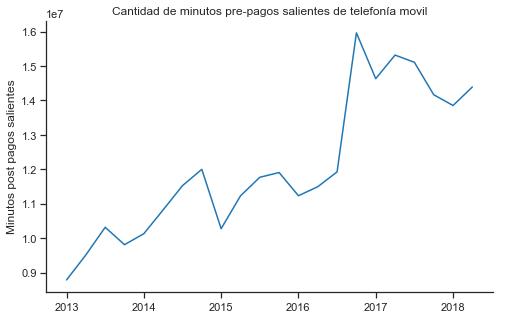

In [84]:
# Plot de minutos post pagos salientes
fig, ax= plt.subplots(figsize=(8,5))
postpay.plot(color=blue)
ax.set_xlabel('')
ax.set_ylabel('Minutos post pagos salientes')
ax.set_title('Cantidad de minutos pre-pagos salientes de telefonía movil')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

[]

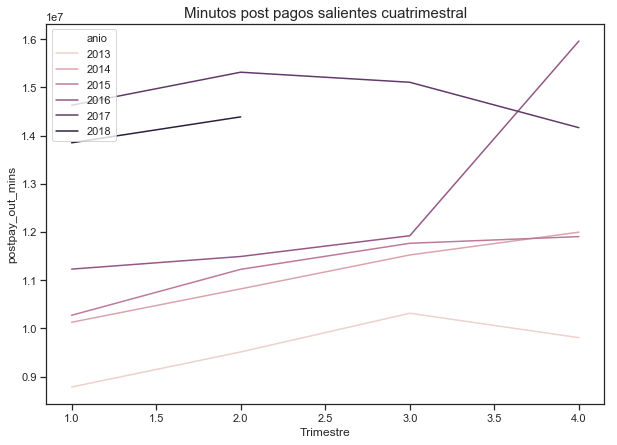

In [103]:
fig, ax= plt.subplots(figsize=(10,7))
sns.lineplot('Trimestre', 'postpay_out_mins', hue='anio', data=data, legend='full')
plt.title('Minutos post pagos salientes cuatrimestral', fontsize=15)
plt.legend(loc='upper left')
plt.plot()

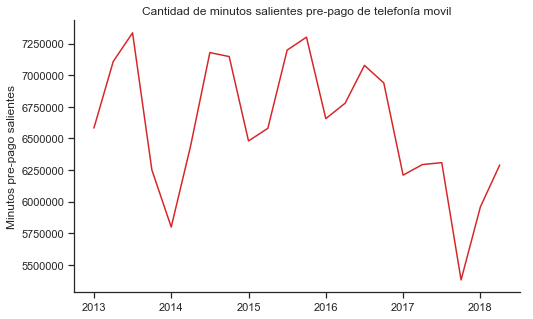

In [19]:
# Plot de minutos pre-pagos salientes
fig, ax= plt.subplots(figsize=(8,5))
prepayout.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Minutos pre-pago salientes')
ax.set_title('Cantidad de minutos salientes pre-pago de telefonía movil')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

[]

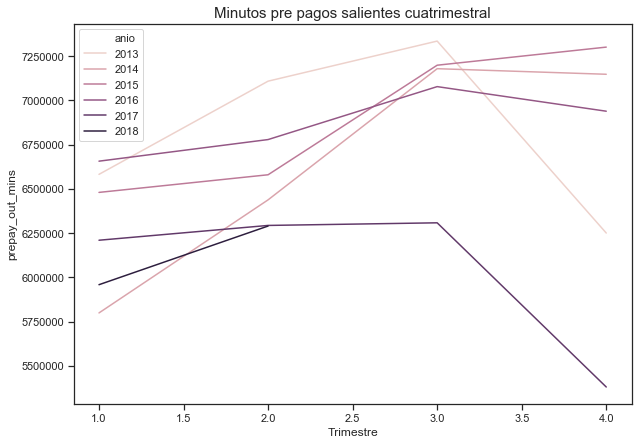

In [104]:
fig, ax= plt.subplots(figsize=(10,7))
sns.lineplot('Trimestre', 'prepay_out_mins', hue='anio', data=data, legend='full')
plt.title('Minutos pre pagos salientes cuatrimestral', fontsize=15)
plt.legend(loc='upper left')
plt.plot()

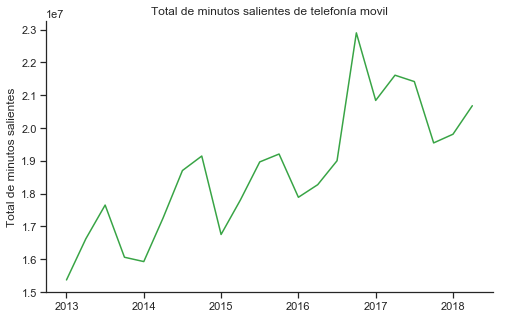

In [20]:
# Plot de total de minutos salientes
fig, ax= plt.subplots(figsize=(8,5))
totalout.plot(color=green)
ax.set_xlabel('')
ax.set_ylabel('Total de minutos salientes')
ax.set_title('Total de minutos salientes de telefonía movil')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

[]

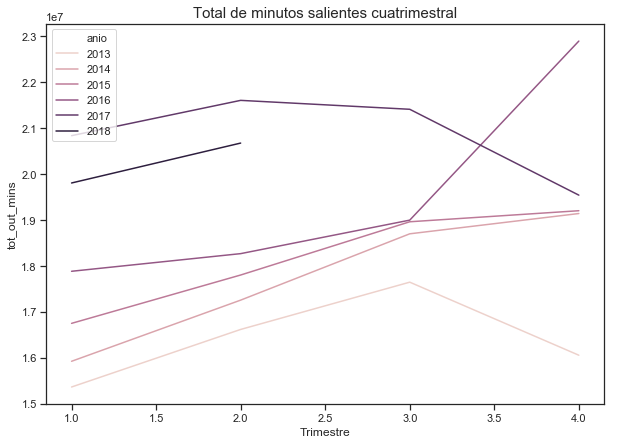

In [106]:
fig, ax= plt.subplots(figsize=(10,7))
sns.lineplot('Trimestre', 'tot_out_mins', hue='anio', data=data, legend='full')
plt.title('Total de minutos salientes cuatrimestral', fontsize=15)
plt.legend(loc='upper left')
plt.plot()

## Implementación de modelos

### Random Walk

### Exponential smoothing